In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
dta= pd.read_csv("Price_Data.csv")
dta.head(10)

,Date,Petrol (USD)
0,06-09-2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,07-07-2003,74.28
5,7/14/2003,74.21
6,7/21/2003,75.07
7,7/28/2003,75.10
8,08-04-2003,75.12
9,08-11-2003,75.44


In [3]:
dta.shape

(813, 2)

In [4]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [5]:
dta["Date"]= pd.to_datetime(dta["Date"])

In [6]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          813 non-null    datetime64[ns]
 1   Petrol (USD)  811 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.8 KB


In [7]:
dta.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [8]:
dta["Petrol (USD)"]=dta["Petrol (USD)"].fillna(dta["Petrol (USD)"].mean())

In [9]:
dta.isnull().sum()

Date            0
Petrol (USD)    0
dtype: int64

In [10]:
dta.rename(columns = {"Petrol (USD)":'Price'},inplace=True)

In [12]:
dta['Date'] = dta['Date'].dt.strftime('%m/%d/%Y')

In [13]:
dta.head()

,Date,Price
0,06/09/2003,74.59
1,06/16/2003,74.47
2,06/23/2003,74.42
3,06/30/2003,74.35
4,07/07/2003,74.28


In [14]:
dta.head()

,Date,Price
0,06/09/2003,74.59
1,06/16/2003,74.47
2,06/23/2003,74.42
3,06/30/2003,74.35
4,07/07/2003,74.28


In [15]:
# grouping sales according to Date
dta.groupby('Date')['Price'].sum()

# min and max values of  Date
print(dta['Date'].min())
print(dta['Date'].max())

01/01/2007
12/31/2018


In [16]:
#set 'Date' as index
dta_df = dta.set_index('Date')
dta_df.index

Index(['06/09/2003', '06/16/2003', '06/23/2003', '06/30/2003', '07/07/2003',
       '07/14/2003', '07/21/2003', '07/28/2003', '08/04/2003', '08/11/2003',
       ...
       '10/29/2018', '11/05/2018', '11/12/2018', '11/19/2018', '11/26/2018',
       '12/03/2018', '12/10/2018', '12/17/2018', '12/24/2018', '12/31/2018'],
      dtype='object', name='Date', length=813)

In [48]:
dta_df.index = pd.to_datetime(dta_df.index)

In [52]:
dta_df.index

DatetimeIndex(['2003-06-09', '2003-06-16', '2003-06-23', '2003-06-30',
               '2003-07-07', '2003-07-14', '2003-07-21', '2003-07-28',
               '2003-08-04', '2003-08-11',
               ...
               '2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-17',
               '2018-12-24', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=813, freq=None)

In [53]:
dta_df.head(10)

,Price
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28
2003-07-14,74.21
2003-07-21,75.07
2003-07-28,75.10
2003-08-04,75.12


In [54]:
dta_df.tail(10)

,Price
Date,
2018-10-29,130.64
2018-11-05,130.11
2018-11-12,128.94
2018-11-19,127.40
2018-11-26,125.77
2018-12-03,124.30
2018-12-10,122.37
2018-12-17,121.02
2018-12-24,120.61


In [56]:
# average the daily cases value for each month 
# use start of each month as the timestamp
y = dta_df['Price'].resample('MS').mean()
y['2003':]

Date
2003-06-01     74.4575
2003-07-01     74.6650
2003-08-01     75.6050
2003-09-01     76.1580
2003-10-01     76.0950
                ...   
2018-08-01    128.5950
2018-09-01    130.2950
2018-10-01    130.5120
2018-11-01    128.0550
2018-12-01    121.6960
Freq: MS, Name: Price, Length: 187, dtype: float64

## Data Visualization

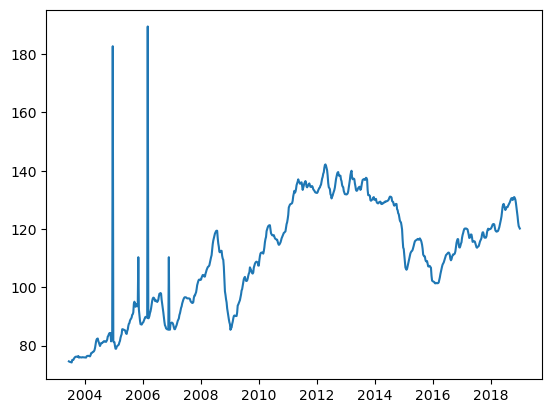

In [58]:
plt.plot(dta_df.Price)

(array([114., 133., 104., 202., 128., 130.,   0.,   0.,   0.,   2.]),
 array([ 74.21,  85.74,  97.27, 108.8 , 120.33, 131.86, 143.39, 154.92,
        166.45, 177.98, 189.51]),
 <BarContainer object of 10 artists>)

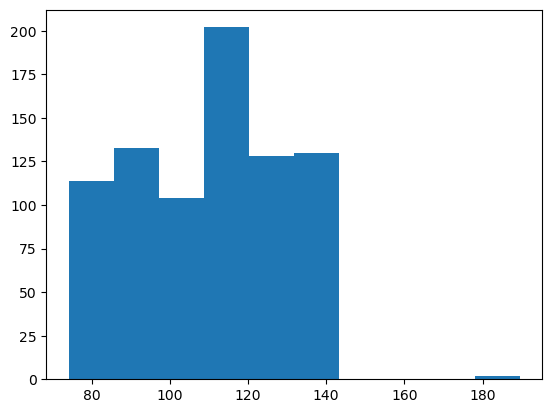

In [59]:
plt.hist(dta_df.Price)

In [60]:
result=seasonal_decompose(dta_df["Price"],model= "multiplicative",period=30)

<Figure size 2000x1000 with 0 Axes>

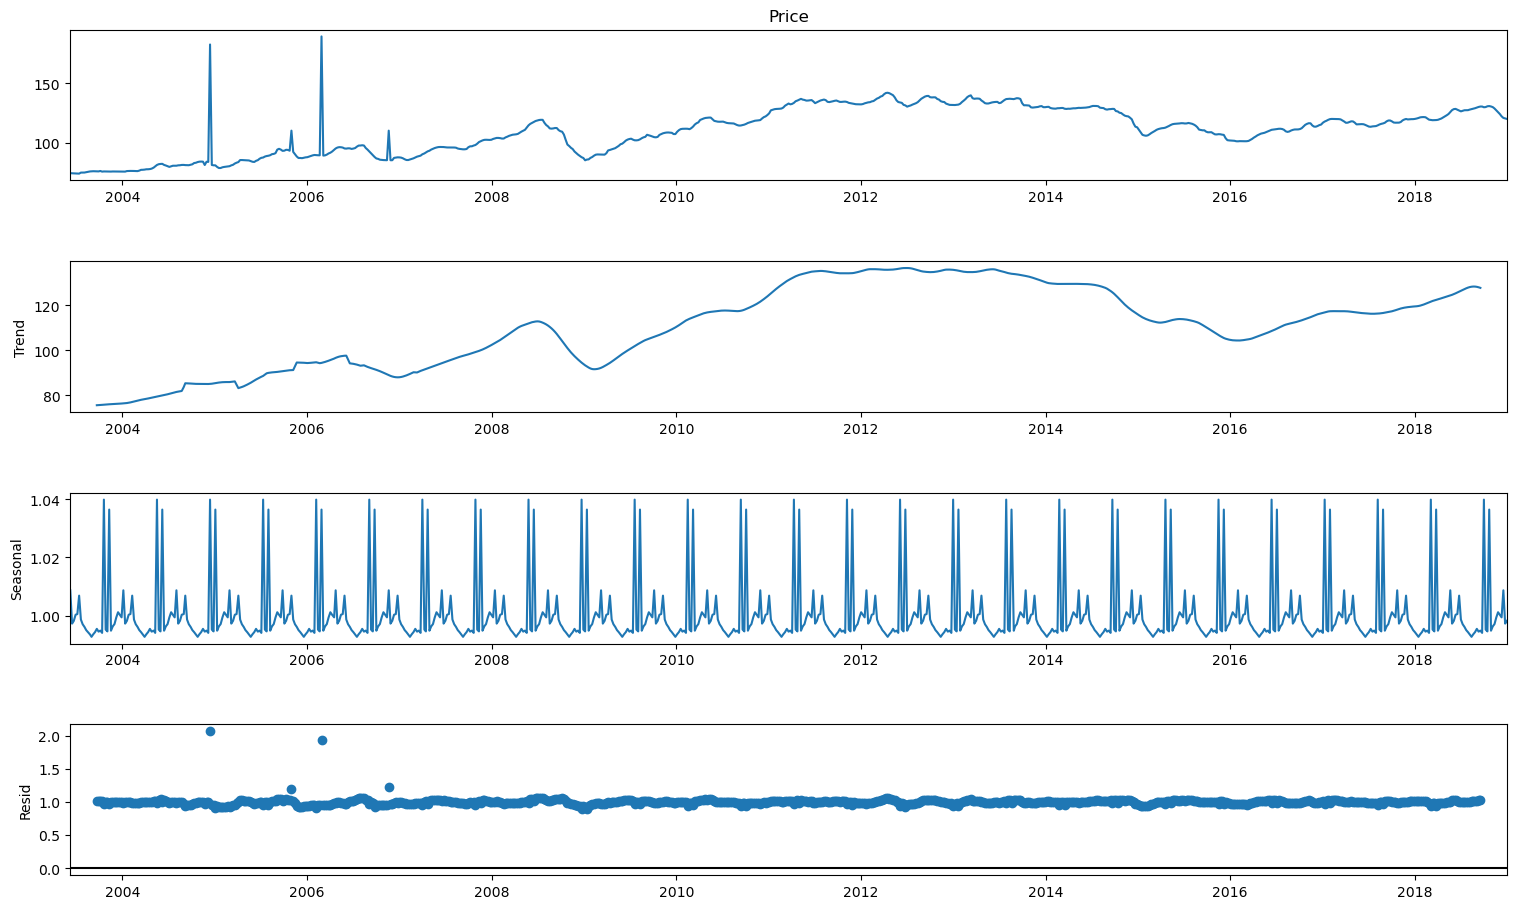

In [61]:
plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [22]:
sm.stats.durbin_watson(dta_df)

array([0.00415672])

C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


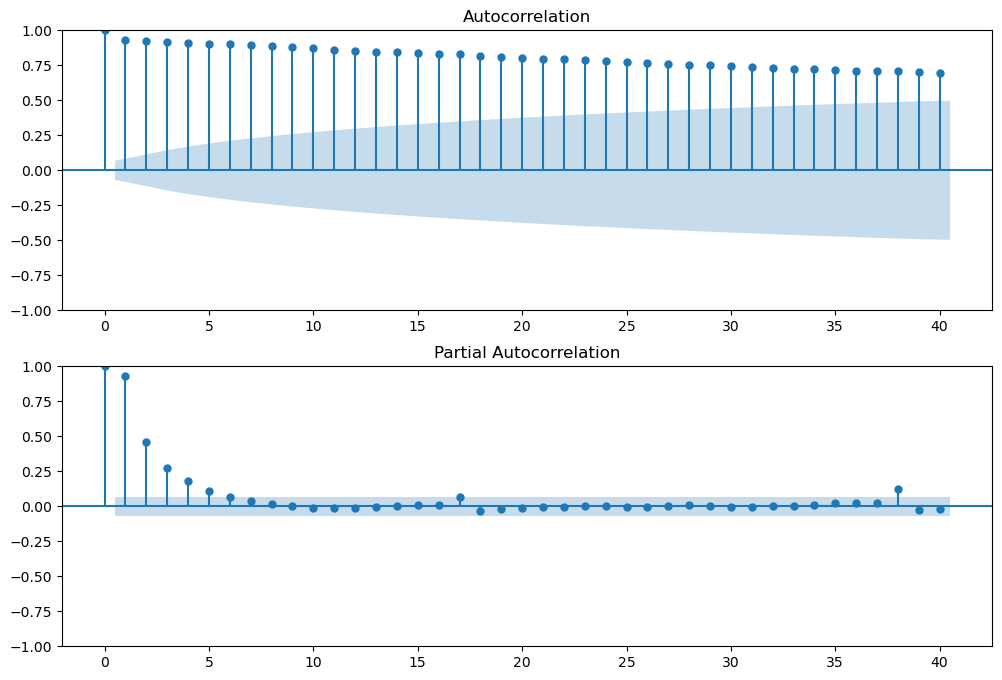

In [23]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta_df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta_df, lags=40, ax=ax2)

In [24]:
training_data=dta_df[0:500]
test_data=dta_df[500
                 :]

In [25]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [26]:
arima= ARIMA(training_data,order=(2,1,3))

In [27]:
import itertools
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [28]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

In [62]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12),
                                  enforce_stationarity = False,
                                  enforce_invertibility=False
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6326      0.222      2.854      0.004       0.198       1.067
ma.L1         -0.7469      0.222     -3.371      0.001      -1.181      -0.313
ar.S.L12      -0.4986      0.030    -16.787      0.000      -0.557      -0.440
sigma2        28.2064      1.815     15.538      0.000      24.648      31.764


In [63]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -497.300
Date:                             Tue, 05 Sep 2023   AIC                           1002.601
Time:                                     11:58:06   BIC                           1014.926
Sample:                                 06-01-2003   HQIC                          1007.605
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6326      0.222      2.854      0.004       0.198       1.067
ma.L1         -0.7469      0.222     -3.371      0.001      -1.181      -0.313
ar.S.L12      -0.4986      0.030    -16.787      0.000      -0.557      -0.440
sigma2        28.2064      1.815     15.538      0.000      24.648      31.764
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               182.16
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Train the ARIMA Model

In [64]:
series = dta_df['Price']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  813
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2584.884
Date:                Tue, 05 Sep 2023   AIC                           5181.769
Time:                        11:58:09   BIC                           5209.966
Sample:                             0   HQIC                          5192.593
                                - 813                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7259      0.008    -87.353      0.000      -0.742      -0.710
ar.L2         -0.5041      0.013    -39.337      0.000      -0.529      -0.479
ar.L3         -0.3369      0.017    -19.402      0.0

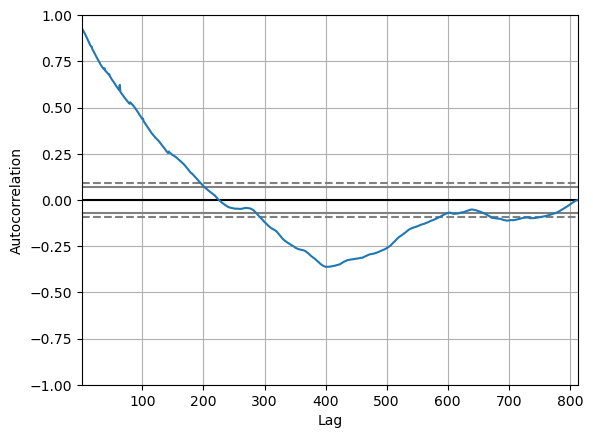

<Figure size 800x560 with 0 Axes>

In [65]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

## Predictions

In [69]:
pred = result.predict('2019','2021',dynamic=True)
pred

2019-01-01    125.226114
2019-02-01    126.563245
2019-03-01    125.654985
2019-04-01    125.776264
2019-05-01    127.733917
2019-06-01    128.632123
2019-07-01    127.584367
2019-08-01    129.227194
2019-09-01    131.358986
2019-10-01    131.023857
2019-11-01    130.694738
2019-12-01    127.931866
2020-01-01    130.235351
2020-02-01    130.844983
2020-03-01    129.570984
2020-04-01    130.391746
2020-05-01    133.644190
2020-06-01    135.471170
2020-07-01    134.531757
2020-08-01    136.049179
2020-09-01    137.965767
2020-10-01    137.906016
2020-11-01    136.515897
2020-12-01    131.959883
2021-01-01    134.875029
Freq: MS, Name: predicted_mean, dtype: float64

In [96]:
pred.to_csv('E:/Ineuron-DS Course/Machine-Learning-Practice/Intership-PetrolPriceForecasting/Predicted.csv')

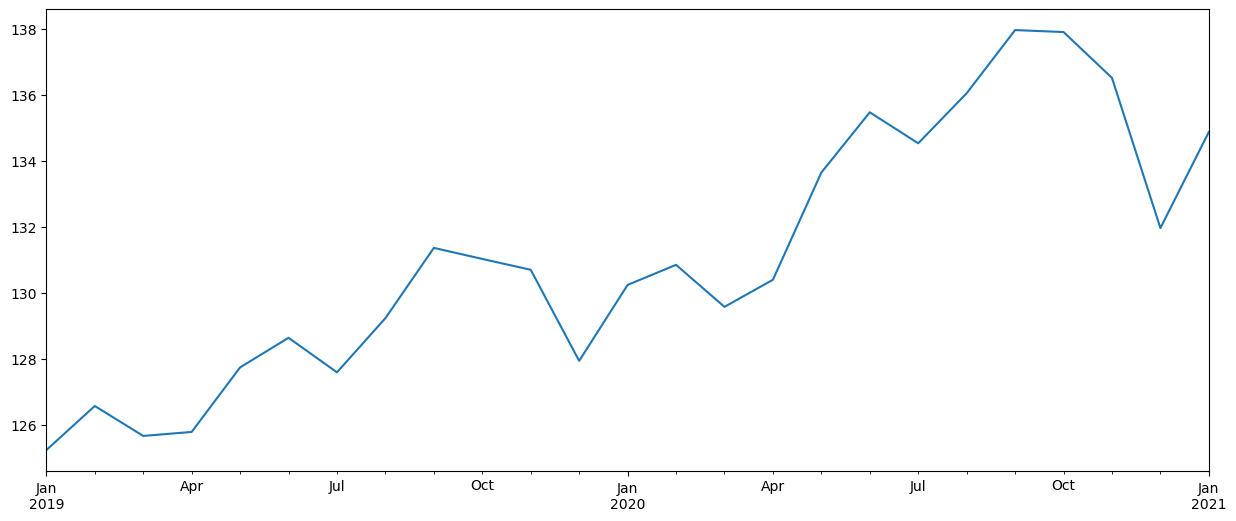

In [70]:
pred.plot(figsize = (15, 6))
plt.show()

## Validating Forecasts

In [93]:
prediction = result.get_prediction(start = pd.to_datetime('01-01-2019'),end=pd.to_datetime('04-12-2020'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Price,upper Price
2019-01-01,114.816799,135.635428
2019-02-01,112.657994,140.468495
2019-03-01,109.374693,141.935278
2019-04-01,107.640529,143.911999
2019-05-01,108.035196,147.432638
2019-06-01,107.554154,149.710092
2019-07-01,105.252125,149.916609
2019-08-01,105.731277,152.723111
2019-09-01,106.768638,155.949334
2019-10-01,105.394369,156.653345


In [97]:
prediction_ci.to_csv('E:/Ineuron-DS Course/Machine-Learning-Practice/Intership-PetrolPriceForecasting/Predicted2.csv')

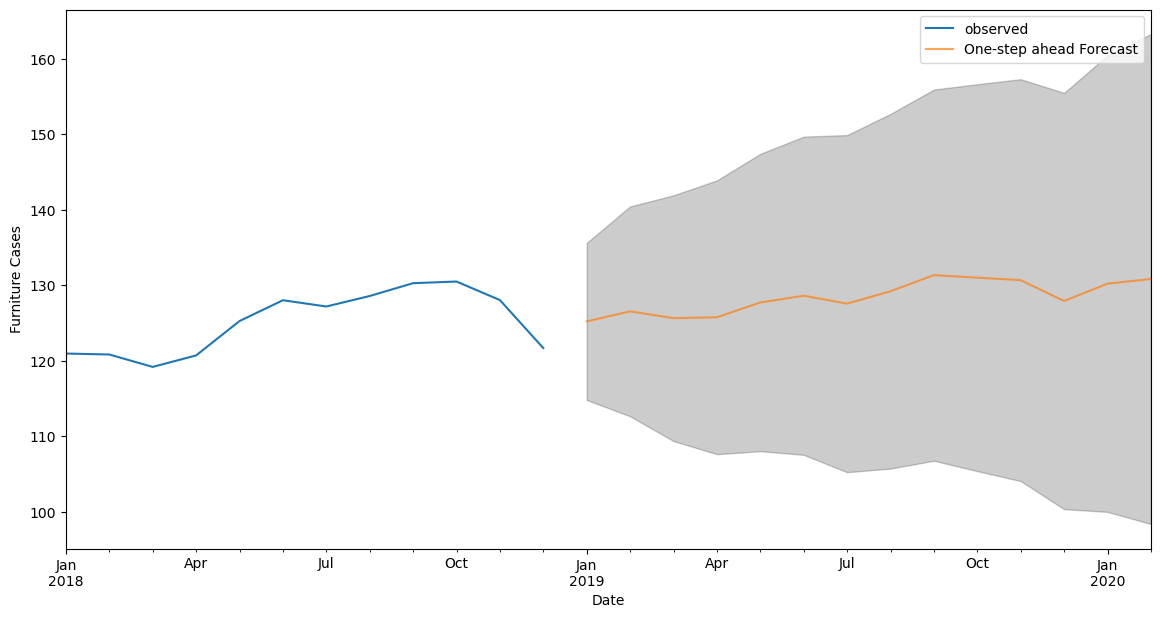

In [75]:
#Visualize the forecasting
ax = y['2018':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Cases')
plt.legend()
plt.show()